In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
upperlimit = np.loadtxt('upper.csv',delimiter=',')
lowerlimit = np.loadtxt('lower.csv',delimiter=',')
exclusion = np.loadtxt('exclusion.csv',delimiter=',')
upperlimit = 10**upperlimit
lowerlimit = 10**lowerlimit
exclusion = 10**exclusion

In [3]:
data = np.loadtxt('scalar_exclude_lim.txt', delimiter=' ')
DMMass = data[:,0]
fav1 = data[:,1]
fav2 = data[:,2]

In [4]:
cluster_1 = np.loadtxt("one_SIDM_cluster.txt", delimiter = '\t')
cluster_p1 = np.loadtxt("pointone_SIDM_cluster.txt", delimiter = '\t')

ValueError: 'color' kwarg must be an color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

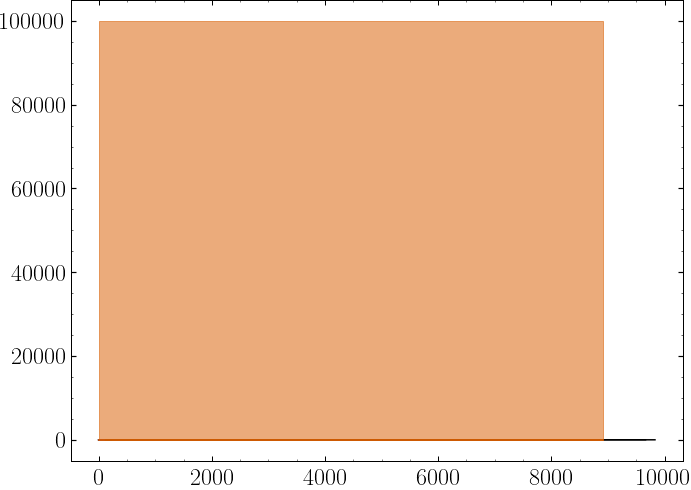

In [18]:
from matplotlib.ticker import LogFormatterSciNotation 
class CustomTicker(LogFormatterSciNotation):
  def __call__(self, x, pos = None): 
    if x not in [0.1, 1, 10]: 
      return LogFormatterSciNotation.__call__(self, x, pos = None) 
    else: 
      return "{x:g}".format(x = x) 

plt.style.use('az-paper-twocol.mplstyle')
plt.close('all')
fig, ax = plt.subplots(figsize=(10, 8))

ax.fill_between(upperlimit[:,1], upperlimit[:,0], color='k', alpha=0.5, label=r'$(\sigma_{\rm SI}/m_\psi)_{\rm dwarf} = (0.1 - 10)\,{\rm cm}^2$/g')
ax.fill_between(lowerlimit[:,1], lowerlimit[:,0], color='w')

ax.fill_between(cluster_p1[:,0], cluster_p1[:,1], color='none', hatch='x', edgecolor='b',  label=r'$(\sigma_{\rm SI}/m_\psi)_{\rm cluster} > 0.1\,{\rm cm}^2$/g')

ax.fill_between(DMMass, fav1, y2=1e5, color='#d95f02', alpha=0.2, label=r'$\lambda_{\rm decay}(y_{\rm SM} = 8 \times 10^{-5}) < 1\,$AU')
ax.fill_between(DMMass, fav2, y2=1e5, color='#d95f02', alpha=0.4, label=r'$\lambda_{\rm decay}(y_{\rm SM} = 1 \times 10^{-5}) < 1\,$AU')

ax.plot(upperlimit[:,1], upperlimit[:,0], color='k')
ax.plot(lowerlimit[:,1], lowerlimit[:,0], color='k')
ax.plot(cluster_p1[:,0], cluster_p1[:,1], color='b')
ax.plot(DMMass, fav1, color='#d95f02')
ax.plot(DMMass, fav2, color='#d95f02')

ax.scatter(100., 0.01, s=500, marker='*', color='fuchsia', zorder=10)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.01, 1e3)
ax.set_ylim(1e-3,1)

ax.set_xlabel(r'DM particle mass ($m_\psi$) [GeV]')
ax.set_ylabel(r'Spin-0 Mediator Mass ($m_\phi$) [GeV]')

ax.legend(loc=2)

ax.xaxis.set_major_formatter(CustomTicker()) 
ax.yaxis.set_major_formatter(CustomTicker()) 
plt.tight_layout()
plt.savefig('constrain_mod_SB.pdf')